In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file = open('../../output/err.txt')
data_txt = file.readlines()

tlist = list()
elist = list()
for row in data_txt[2:]:
    _thrd, _sign, now_t, now_e = row.split()
    tlist.append(float(now_t))
    elist.append(float(now_e))

In [3]:
data = pd.DataFrame({'time': tlist,
                     'energy': elist})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    100000 non-null  float64
 1   energy  100000 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


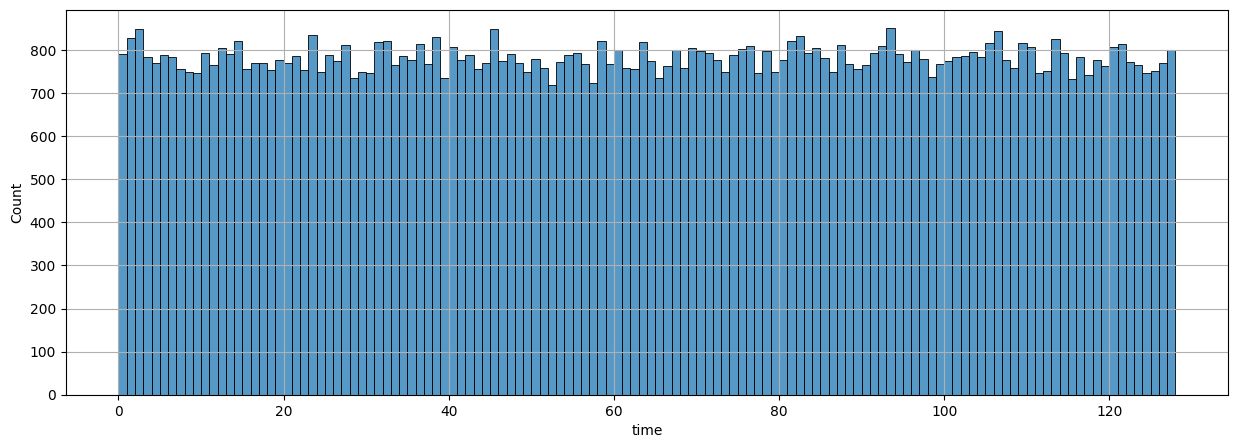

In [5]:
plt.figure(figsize=(15, 5))
plt.grid()
sns.histplot(data['time'], bins=128);

In [6]:
norm = (3500) ** -1
file = open('../../input/IntPam2010.txt')
lines = file.readlines()
E_2010 = []
flux_2010 = []
for line in lines[1:]:
    e, f = line.split()
    E_2010.append(float(e))
    flux_2010.append(float(f) * norm)

flux_data = pd.DataFrame({'flux': flux_2010,
                     'energy': E_2010})

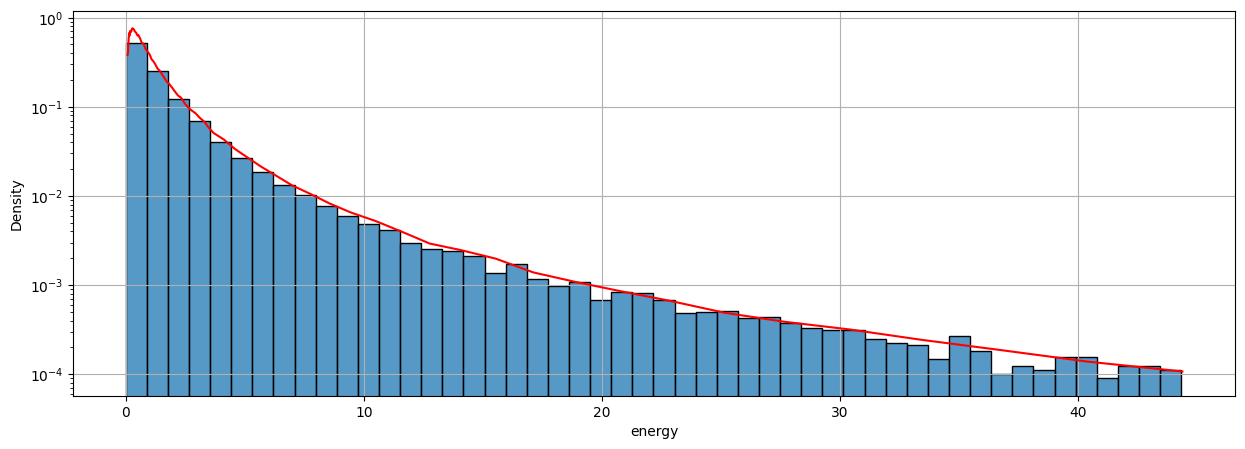

In [7]:
plt.figure(figsize=(15, 5))
plt.grid()
weights = np.ones_like(data['energy']) / len(data)
sns.histplot(data['energy']/1000., bins=50, stat='density')
plt.plot(E_2010, flux_2010, color='red')
plt.yscale('log')
#plt.xscale('log');